In [8]:
# Workaround to use src modules
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [15]:
# Library imports
import imageio
import numpy as np
import matplotlib.pyplot as plt

from skimage import filters
from skimage.color import rgb2lab
from scipy.stats import mode

from sklearn.cluster import KMeans
from scipy.ndimage import convolve
from scipy.ndimage import gaussian_filter

# Functions Imports
from src.utils import image_to_grayscale, image_minmax_norm, load_image, image_downsampling
from src.quantization import image_bitshift, palette_kmeans
from src.segmentation import threshold_segmentation, otsu_segmentation, labels_to_edges
from src.visualizations import visualize_bitshift_images, plot_pallete, plot_imagegrid

## Objetivo

Adicionar as etapas de pré-processamento (down-sampling & gaussian), passar para extração de paleta e em seguida salvar os resultados no path desejado :)

In [36]:
def exploratory_pipeline(image_path, N=8, palette_shape=(2,8), save_name=None):
    outpath = "../images/exploratory"
    
    # 1º Step - Loading RGB image (ignore 4º channel if exists with image[:,:,:3])
    print("1º Step - Loading image....")
    image = load_image(image_path)[:,:,:3]
    
    # 2º Step - Pré-processing
    # ------------------------
    # - Imagen Downsampling (max size to 1024)
    # - Gaussian Filter (sigma=2 to smooth without lose much details)
    print("2º Step - Image pre-processing")
    # image = image_downsampling(image)
    image_smooth = np.zeros(image.shape)
    for c in range(3):
        image_smooth[:,:,c] = gaussian_filter(image[:,:,c], sigma=2, mode='nearest')
    
    # 3º Step - Palette Extraction (Kmeans) & Edge Detection
    # ------------------------------------------------------
    print("3º Step - Palette extraction")
    palette, image_recolorized, labelsmap, _ = palette_kmeans(image_smooth, N)
    edgemap = labels_to_edges(labelsmap)
    
    
    # 4º Step - Region & Edgemap Processing (On going)
    # ------------------------------------------------
    # - Remove too small color regions (using synflood to calculate region areas)
    # - Remove thick edges (increase % of drawable area)
    
    # Last Step - Saving results to visualization
    print("Exporting images...")
    if save_name != None:
        imageio.imwrite(f"{outpath}/{save_name}_00_sampled.jpg", image)
        imageio.imwrite(f"{outpath}/{save_name}_01_smooth.jpg", image_smooth)
        imageio.imwrite(f"{outpath}/{save_name}_02_recolorized.jpg", image_recolorized)
        imageio.imwrite(f"{outpath}/{save_name}_03_edges.jpg", edgemap * 255)
    
    # Extra Step - Plotting Pallete end results in jupyter
    print("Drawable area: ", np.sum(edgemap == 0)/edgemap.size)
    plot_pallete(palette, palette_shape)
    plot_imagegrid([image, image_recolorized, edgemap], shape=(1,3), figsize=(40,40))

1º Step - Loading image....
2º Step - Image pre-processing
3º Step - Palette extraction


Lossy conversion from float64 to uint8. Range [0.0, 253.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [24.21314736114863, 229.779524505585]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


Exporting images...
Drawable area:  0.6339077102803738


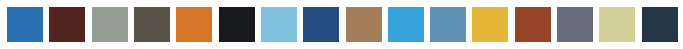

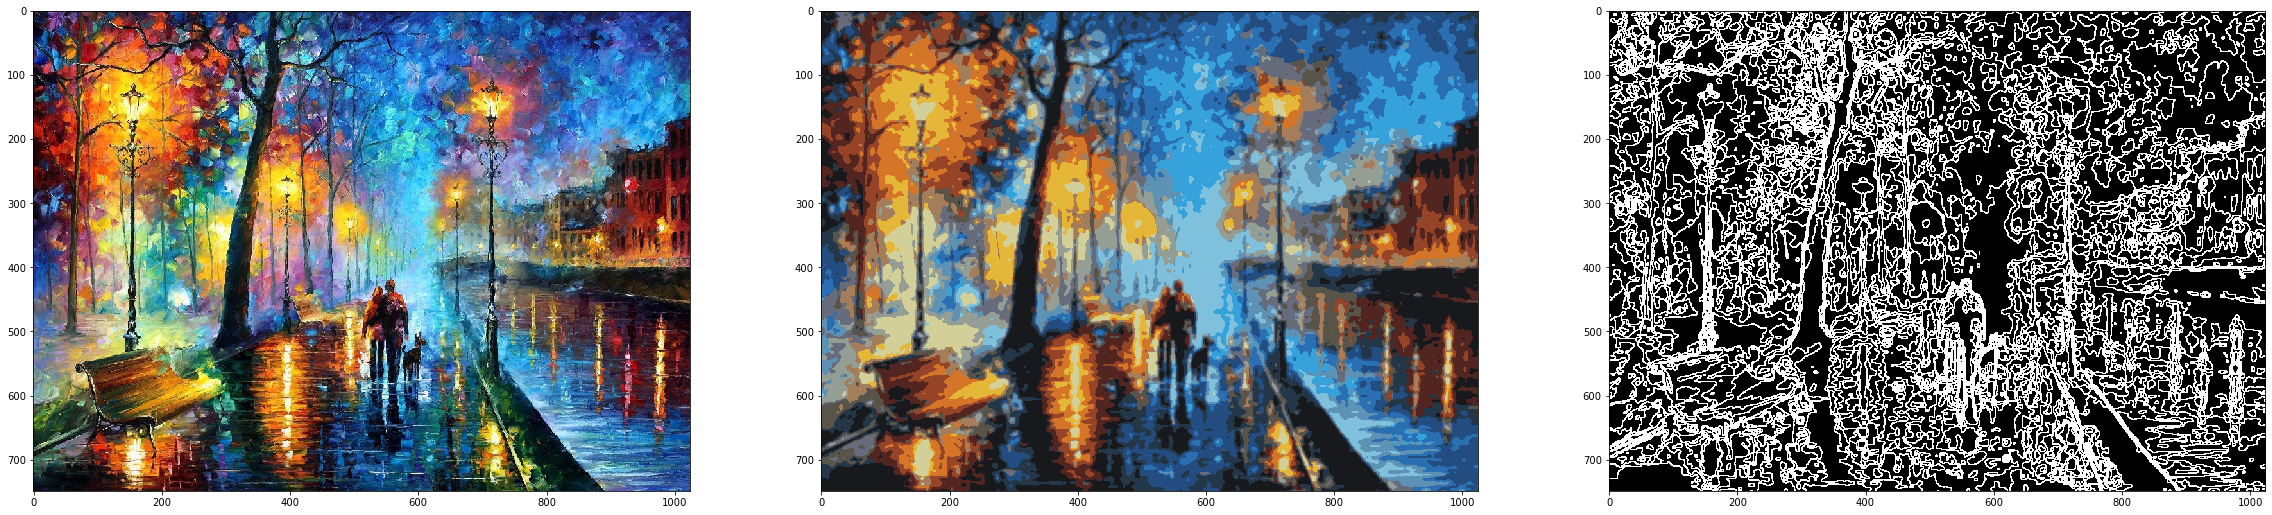

In [27]:
exploratory_pipeline('../images/raw/painting_afremov.jpg', N=16, palette_shape=(1,16), save_name="afremov")

1º Step - Loading image....
2º Step - Image pre-processing
3º Step - Palette extraction


Lossy conversion from float64 to uint8. Range [0.0, 243.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [24.840152023267706, 225.66090734011001]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


Exporting images...
Drawable area:  0.6553434983528551


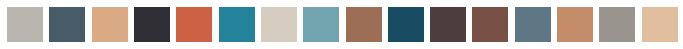

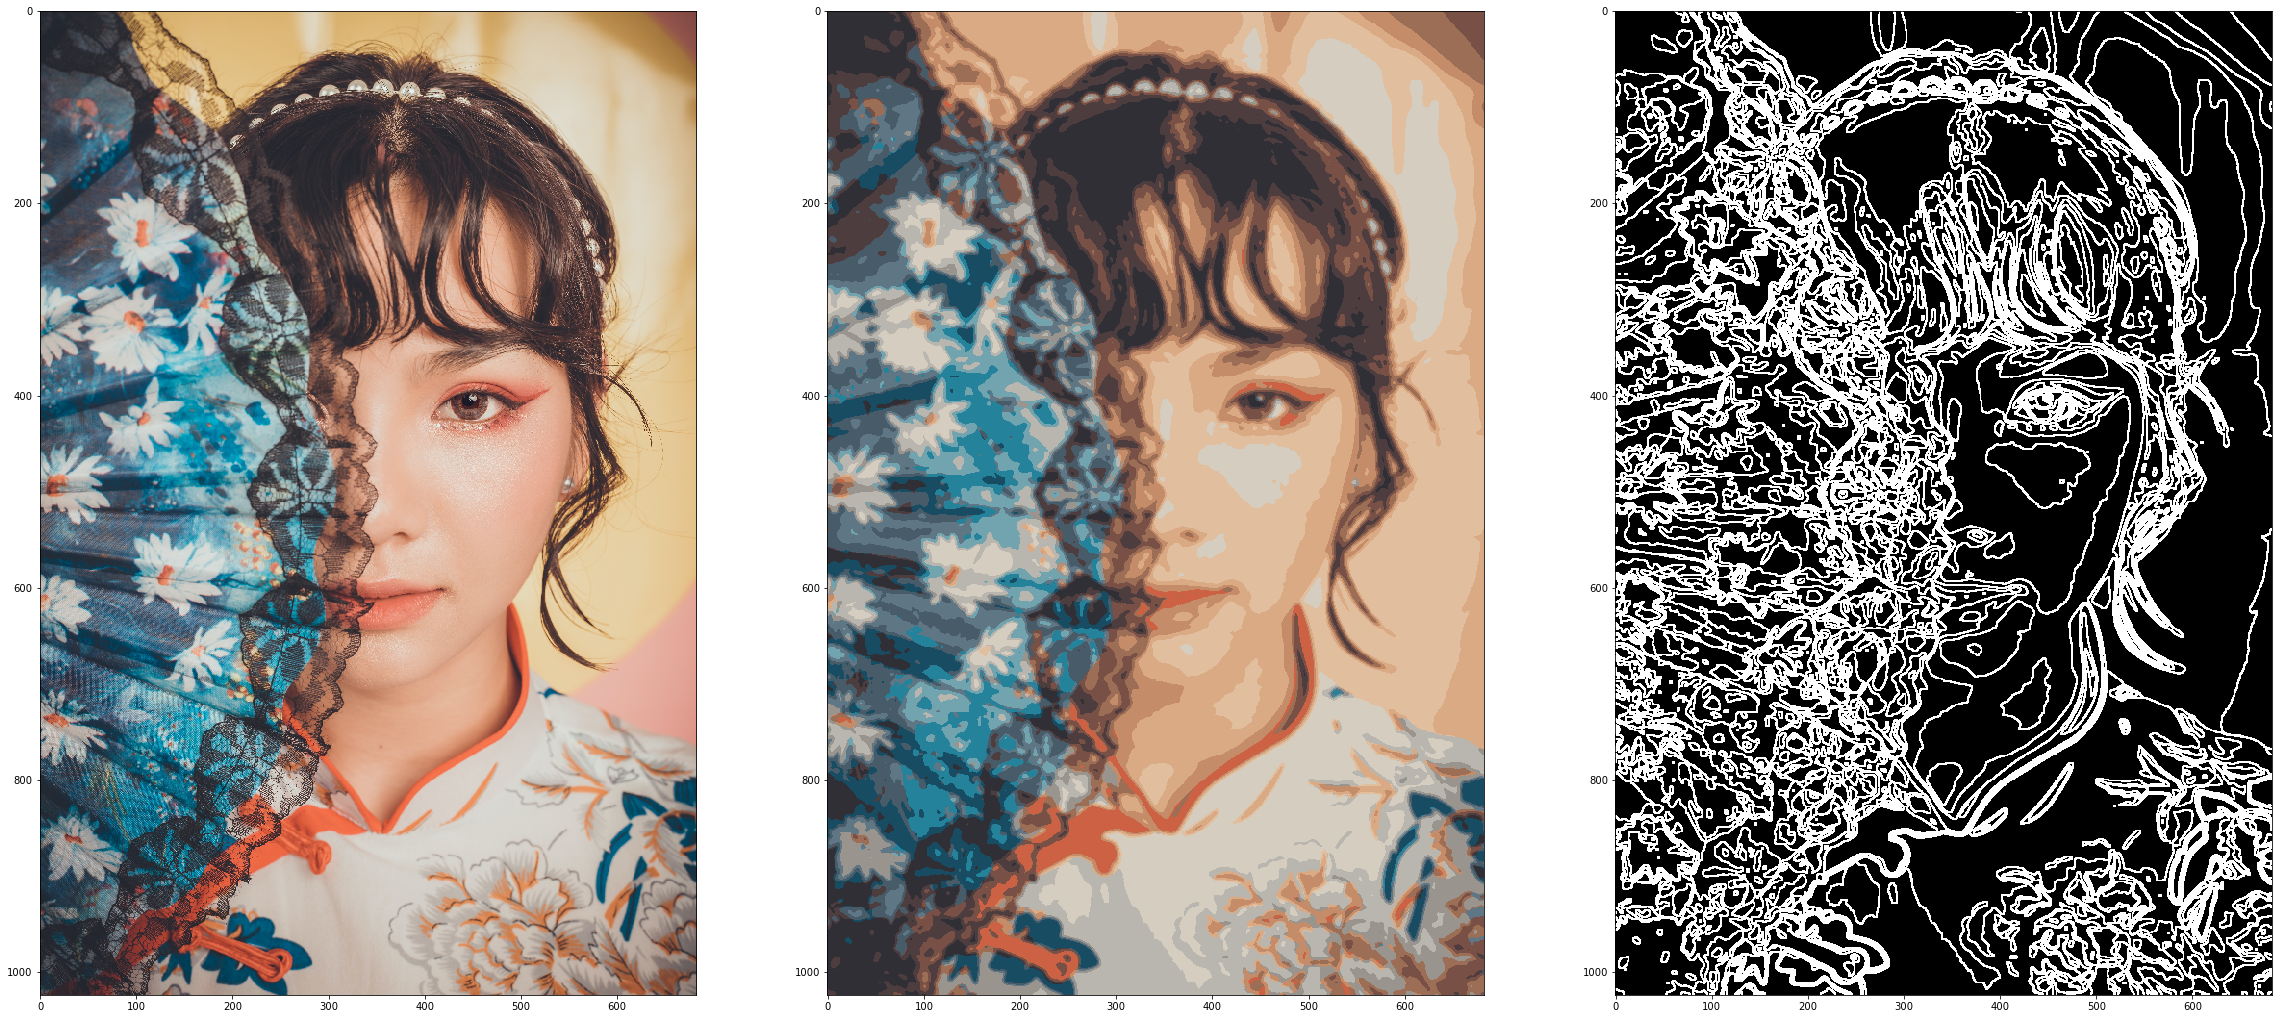

In [28]:
exploratory_pipeline('../images/raw/oriental_selfie.jpg', N=16, palette_shape=(1,16), save_name="oriental_selfie")

1º Step - Loading image....
2º Step - Image pre-processing
3º Step - Palette extraction


Lossy conversion from float64 to uint8. Range [0.0, 197.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.5178523126847878, 177.18268148564798]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


Exporting images...
Drawable area:  0.3149687074829932


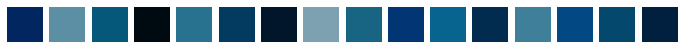

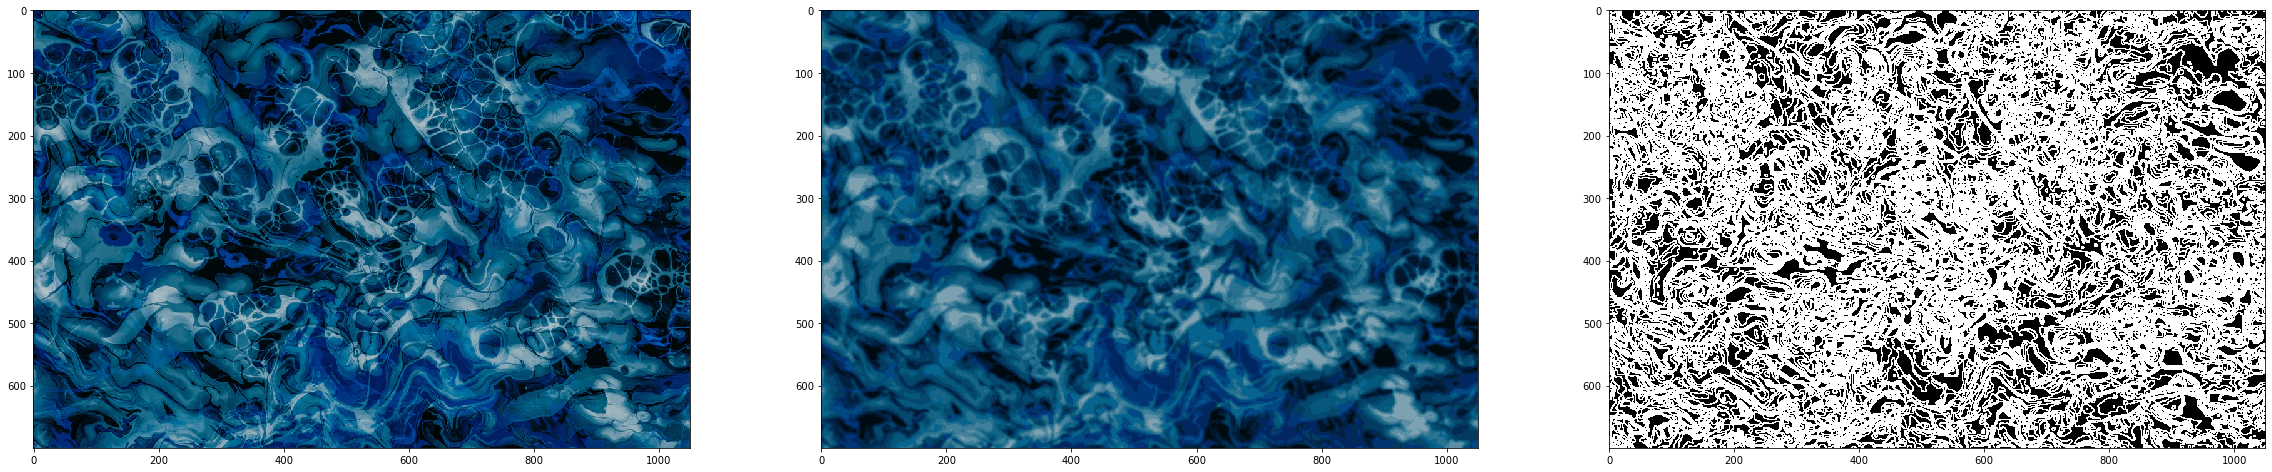

In [37]:
exploratory_pipeline('../images/raw/abstract_ocean.png', N=16, palette_shape=(1,16), save_name="abstract_ocean")

1º Step - Loading image....
2º Step - Image pre-processing
3º Step - Palette extraction


Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [11.533068171306411, 239.16535142216787]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


Exporting images...
Drawable area:  0.702450019405109


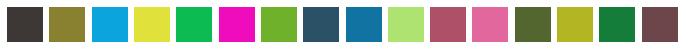

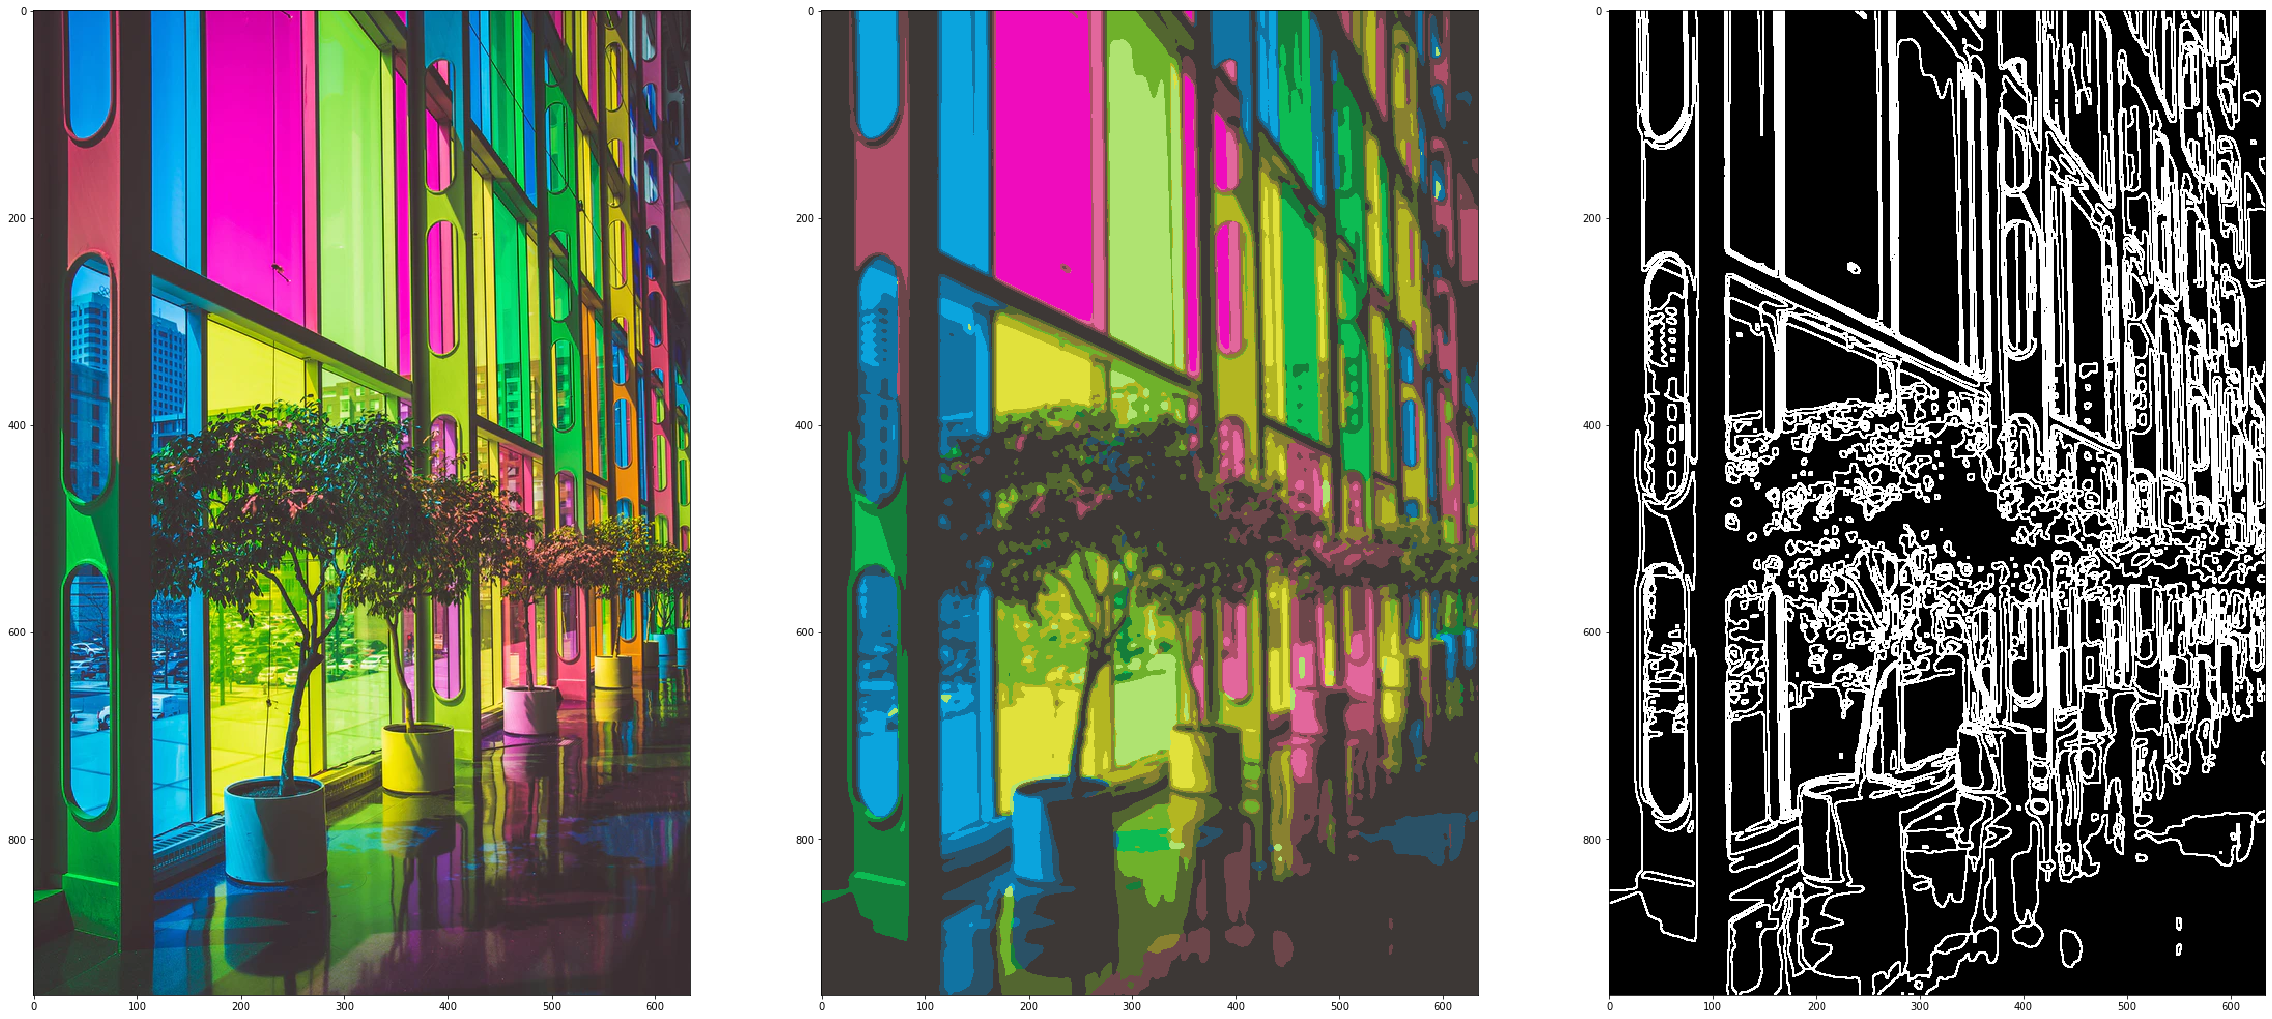

In [31]:
exploratory_pipeline('../images/raw/scenario_rainbow.png', N=16, palette_shape=(1,16), save_name="scenario_rainbow")

1º Step - Loading image....
2º Step - Image pre-processing
3º Step - Palette extraction


Lossy conversion from float64 to uint8. Range [0.0, 247.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.051865089921829366, 209.6744077051389]. Convert image to uint8 prior to saving to suppress this warning.


Exporting images...


Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


Drawable area:  0.8948312925170068


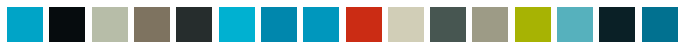

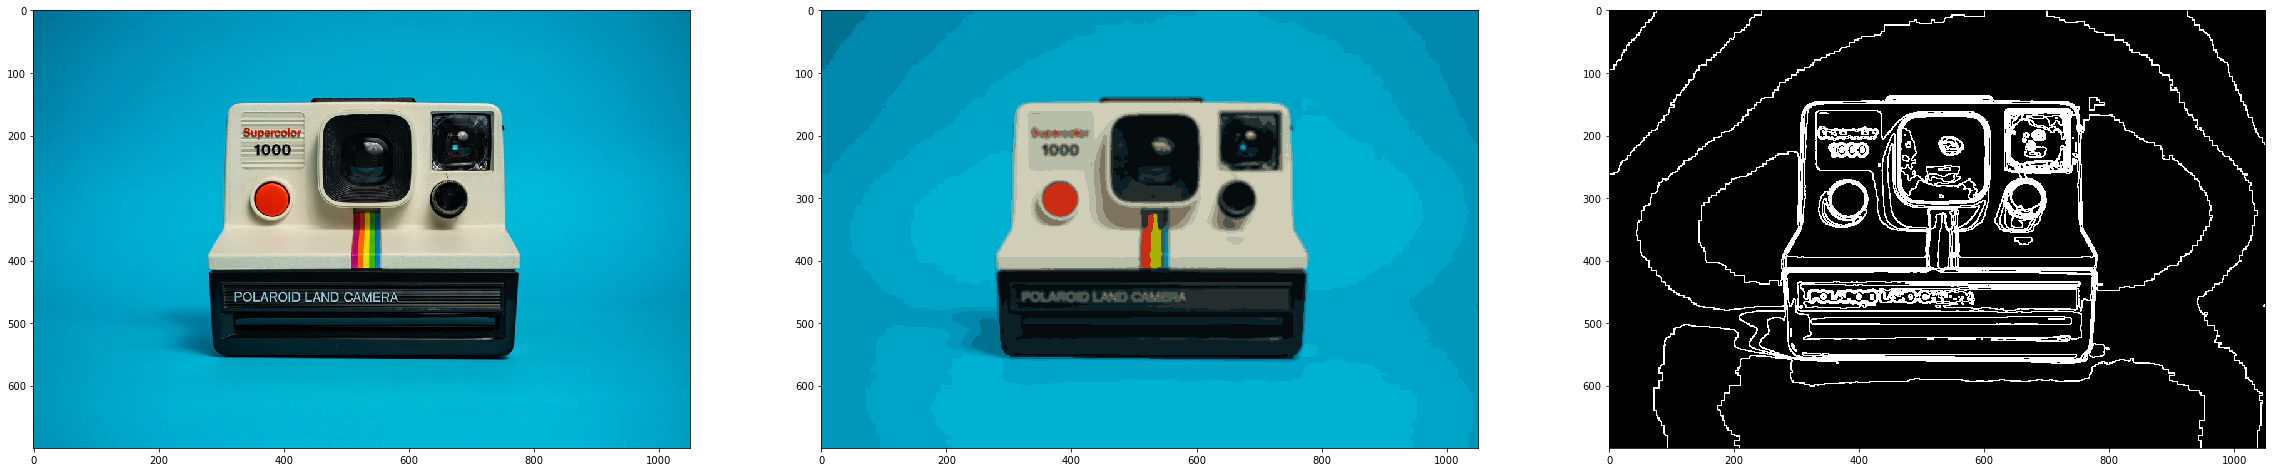

In [38]:
exploratory_pipeline('../images/raw/polaroid.png', N=16, palette_shape=(1,16), save_name="polaroid")

1º Step - Loading image....
2º Step - Image pre-processing
3º Step - Palette extraction


Lossy conversion from float64 to uint8. Range [0.0, 253.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [2.617201275920195, 216.76391568948418]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


Exporting images...
Drawable area:  0.560935


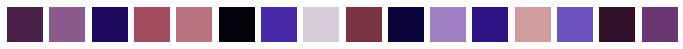

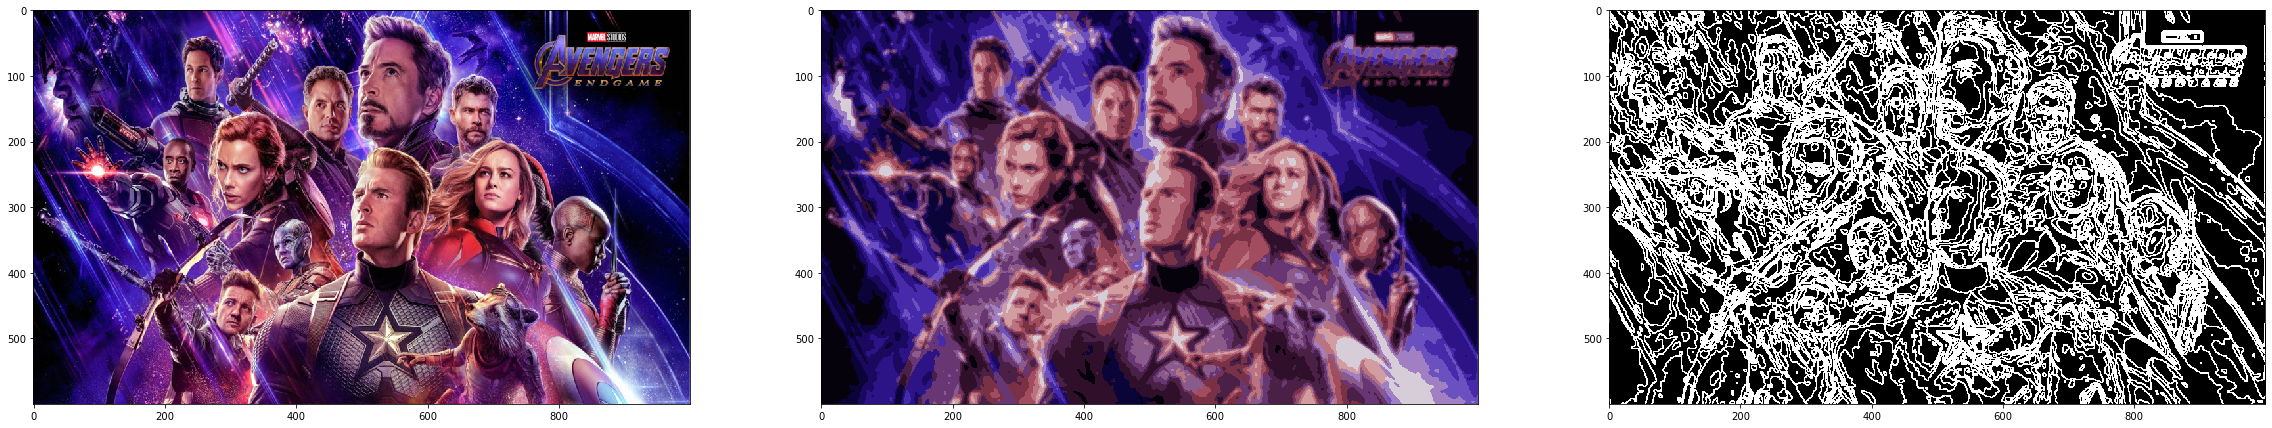

In [33]:
exploratory_pipeline('/home/gabriel/Imagens/avengers.jpg', N=16, palette_shape=(1,16), save_name="avengers")

1º Step - Loading image....
2º Step - Image pre-processing
3º Step - Palette extraction


Lossy conversion from float64 to uint8. Range [6.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [14.16776519226741, 243.82014163914454]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


Exporting images...
Drawable area:  0.8396293333333333


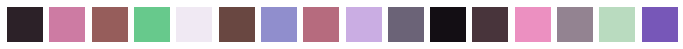

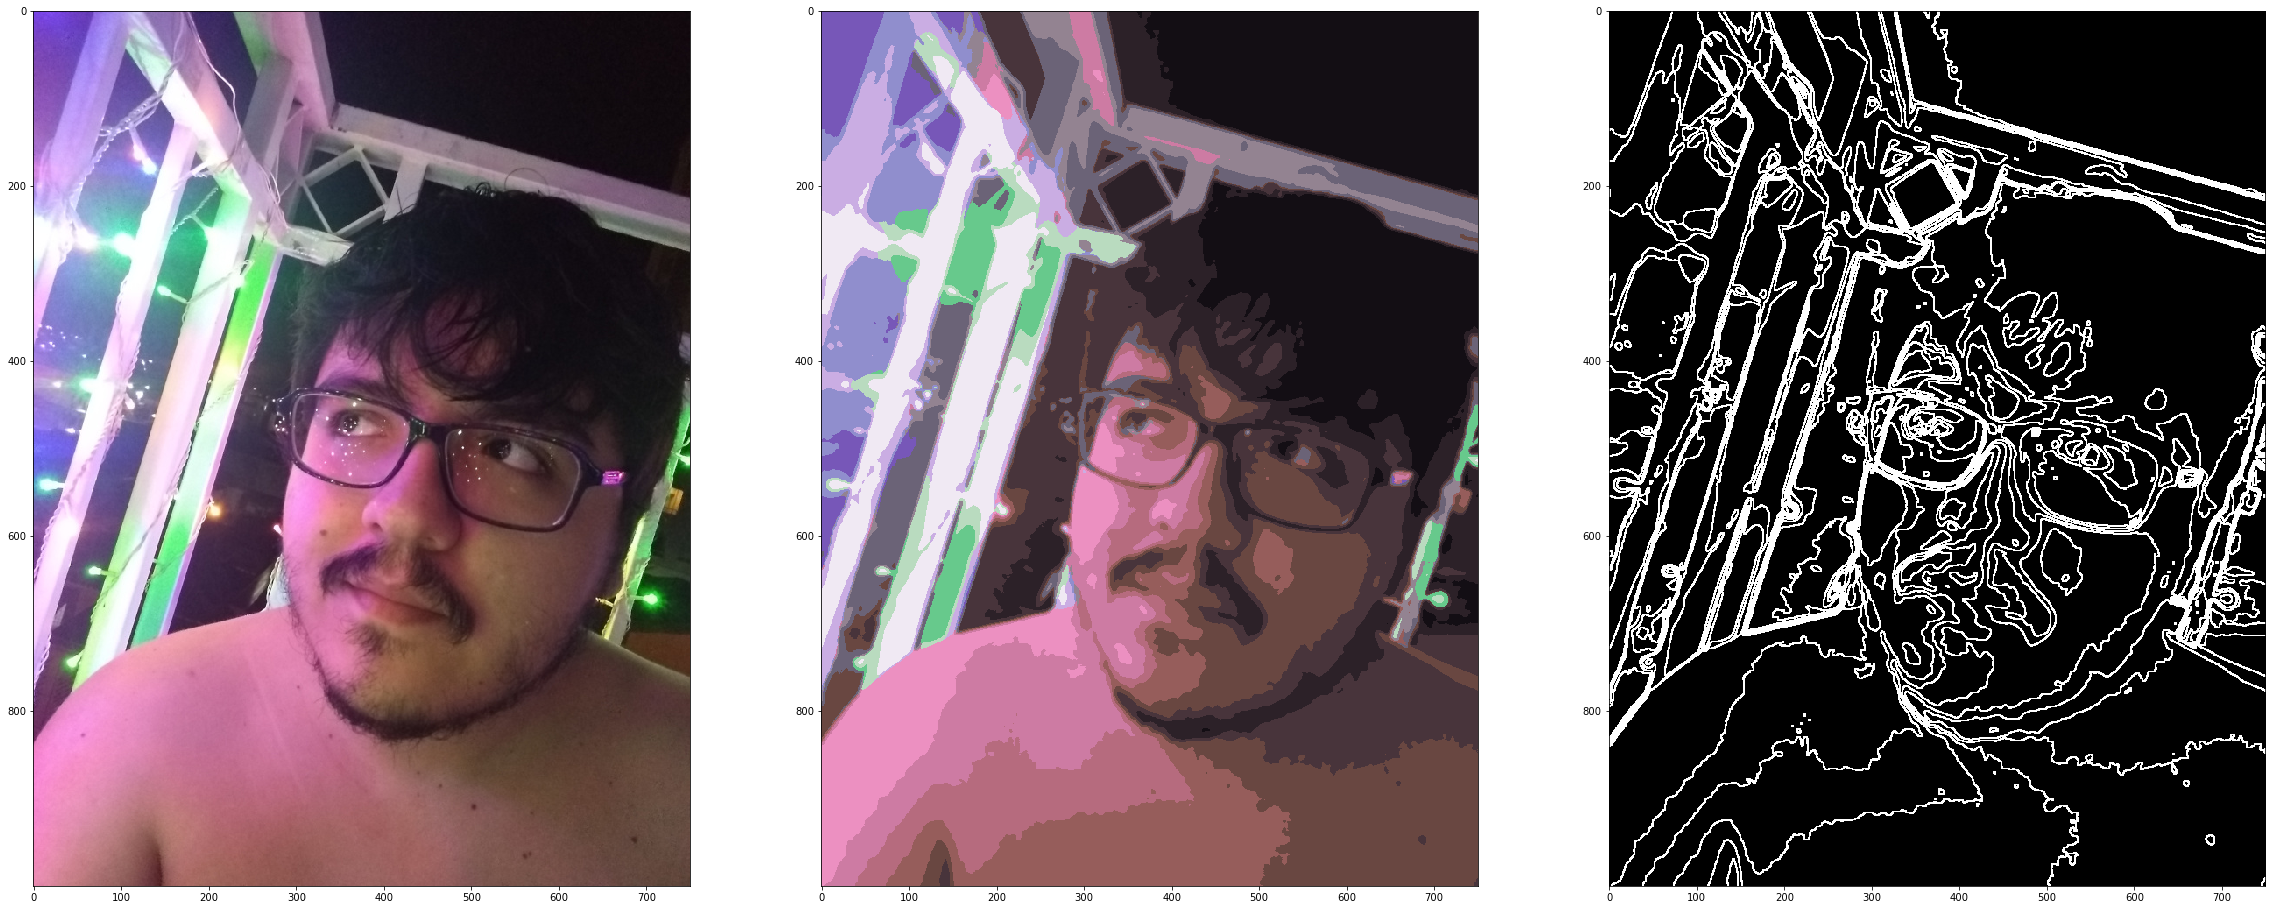

In [34]:
exploratory_pipeline('/home/gabriel/Imagens/gabriel.jpg', N=16, palette_shape=(1,16), save_name="gabriel")